## Plot multiple OPTICS results

In [1]:
import os, glob, getpass, sys
import warnings

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy.utils.exceptions import AstropyWarning

user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
from gaia.cluster_comparison_n import Comparison_n
path = '../../'

import itertools

In [2]:
# Read data ====================================
warnings.simplefilter('ignore', AstropyWarning)
data     = Table.read(path + 'sample_gaia/gaia_sample_cleaned.vot',       format = 'votable')
control  = Table.read(path + 'sample_control/OPH___control_sample.vot',   format = 'votable') ; control.label = 'Control'


# Read Optics results ==========================
op_tabs  = glob.glob('cl_optics_mpts*vot')
op_tabs.sort() # This is important!
clusters = []
for inp in op_tabs:
    mpts     = inp[inp.rfind('_')+1:inp.rfind('.')]
    tb       = Table.read(inp)
    tb.label = 'mPts = ' + np.str(mpts)
    clusters.append(tb)

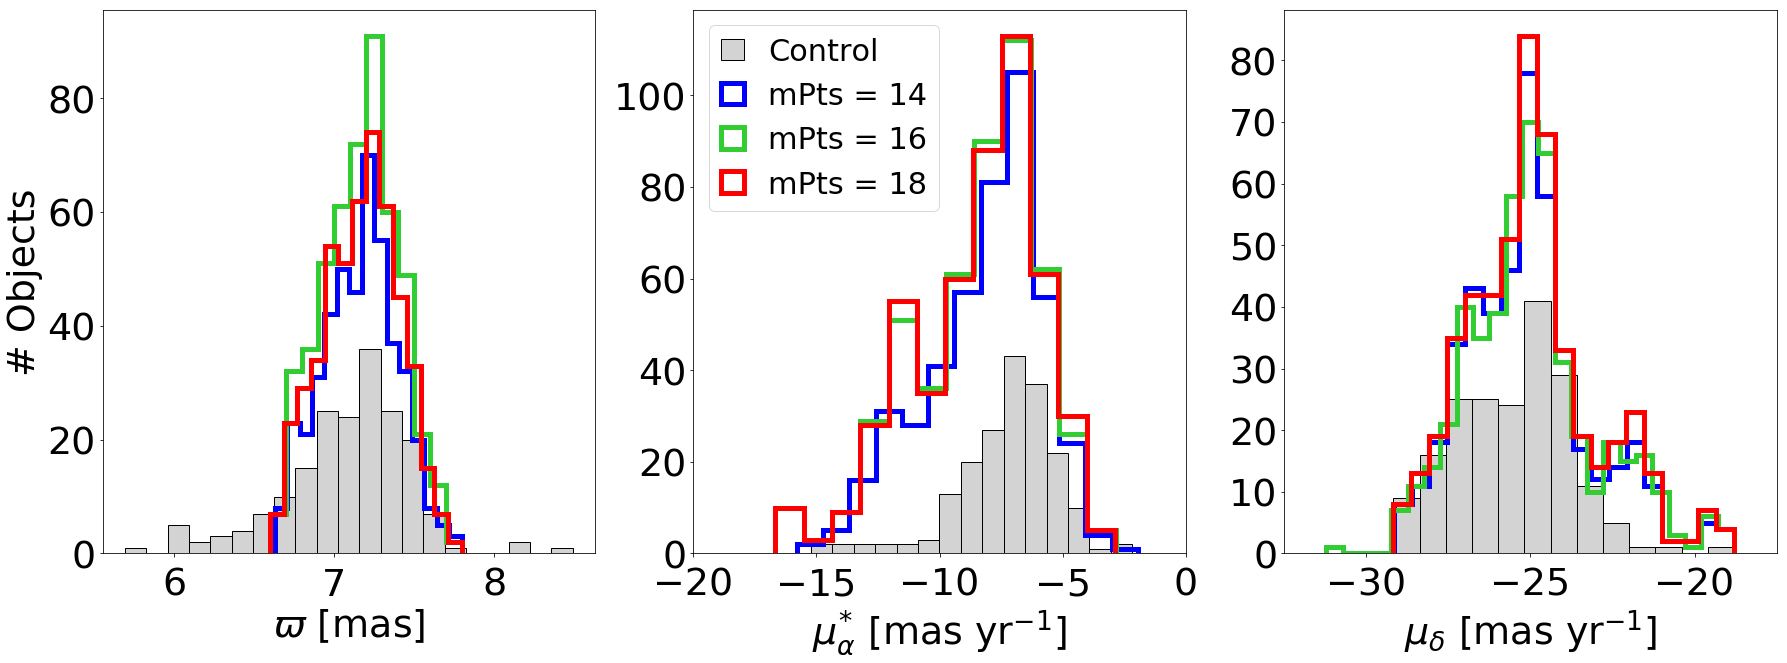

In [3]:
# Plot Histograms ==============================
colors  = itertools.cycle(['blue', 'limegreen', 'red'])
test    = Comparison_n()
test.load_clusters(control=control, cluster_list=clusters)
hists   = test.plot_3_hist(x1_bins=5, x2_bins=5, x3_bins=5, fig_nm='03_plot_multi_optics_results_ap0.pdf', x2lim=[-20,0], x3lim=[-32.5,-17.5], 
                 linewidth=5, colors=colors, ftsize = 38, hist_blocks=['knuth', 'scott', 'knuth'], ylabel_1 = '# Objects')

In [4]:
# Create Table to quickly inspect the outputs ====
output            = Table.read('output_optics.tex', format = 'ascii.latex')
output['Control'] = [len(join(cluster, test.control, keys='source_id')) for cluster in test.clusters]
output.write('output_optics.tex', format = 'ascii.latex', overwrite = True)
output

Algorithm,mPts,Eps,Elements,Control
str6,int64,float64,int64,int64
OPTICS,14,0.245,451,157
OPTICS,16,0.259,494,157
OPTICS,18,0.265,497,159


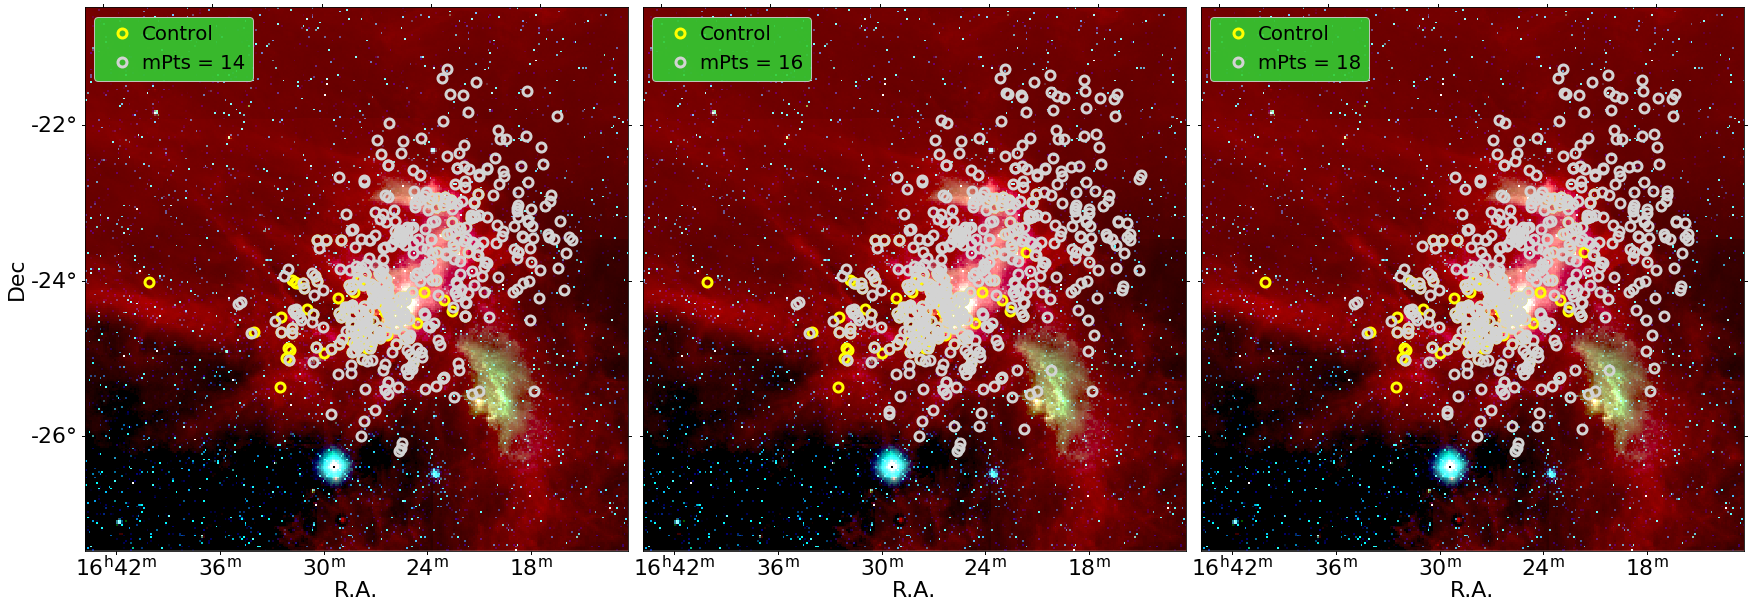

In [5]:
# Plot Wise ====================================
test.read_wise_fits(path + 'sample_control/wise_RGB_img.fits')
test.plot_wise_img_3(figname='03_plot_multi_optics_results_ap1.pdf', markersize=9, mew=3, mec_1 = 'yellow', mec_2='lightgrey', legend_color='limegreen')